# **PD Model**

In [ ]:
import pandas as pd
import sklearn
import numpy as np
from sklearn import preprocessing

from google.colab import drive
drive.mount('/content/drive')
#credit=pd.read_csv("drive/MyDrive/Colab Notebooks/german.csv")
#credit=credit.drop(credit.columns[0], axis=1)
credit=pd.read_csv("drive/MyDrive/Colab Notebooks/Credit_default_dataset.csv")

#credit.describe()


                  
                 

Mounted at /content/drive


In [ ]:
#We don't need the ID column,so lets drop it.
credit = credit.drop(["ID"],axis=1)

In [ ]:
#changing the name of  pay_0 column to pay_1 to make the numbering correct

In [ ]:
credit.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [ ]:
credit.head(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1


In [ ]:
#Removing Unwanted categorical levels as mentioned in data exploration
credit['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
#Changing Education levels 0,5,6 to others(4)
credit["EDUCATION"]=credit["EDUCATION"].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})

In [ ]:
credit['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [ ]:
credit['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
#similarly chaning marriage level 0 to level 3
credit["MARRIAGE"]=credit["MARRIAGE"].map({0:3,1:1,2:2,3:3})

In [ ]:
credit['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [ ]:
#Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(credit)

array([[0.01010101, 1.        , 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       [0.11111111, 1.        , 0.33333333, ..., 0.        , 0.00378311,
        1.        ],
       [0.08080808, 1.        , 0.33333333, ..., 0.00234451, 0.00945777,
        0.        ],
       ...,
       [0.02020202, 0.        , 0.33333333, ..., 0.00468901, 0.00586382,
        1.        ],
       [0.07070707, 0.        , 0.66666667, ..., 0.12417444, 0.00341236,
        1.        ],
       [0.04040404, 0.        , 0.33333333, ..., 0.00234451, 0.00189155,
        1.        ]])

In [ ]:
#check for null values
credit.apply(lambda x: sum(x.isnull()),axis=0) 

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [ ]:
#Initial Model training(except feed forward neural network)
from sklearn.model_selection import train_test_split

train, test = train_test_split(credit, test_size = 0.3)
X=credit.drop('default.payment.next.month',axis=1)
Y=credit['default.payment.next.month']
X_train = train.drop('default.payment.next.month',axis=1)
pd_inputs=X.columns.values
y_train = train['default.payment.next.month']

X_test =  test.drop('default.payment.next.month',axis=1)

y_test = test['default.payment.next.month']


### **Logistic Regression**

In [ ]:
#Train benchmark model(Log Regression)
from sklearn.linear_model import LogisticRegression
clf0 = LogisticRegression()
clf0.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
y_pred = clf0.predict(X_test)
accuracy_regr=accuracy_score(y_test, y_pred)
precision_regr=precision_score(y_test, y_pred,average='weighted')
recall_regr=recall_score(y_test, y_pred,average='weighted')
f1_regr=f1_score(y_test,y_pred,average='weighted')
print("accuracy:", accuracy_regr)
print("Precision:", precision_regr)
print("Recall:", recall_regr)
print('f1_score:',f1_regr)

accuracy: 0.7794444444444445
Precision: 0.8281000098787384
Recall: 0.7794444444444445
f1_score: 0.6830603793351095


## **Random Forest**

In [ ]:
#Train other classifiers
#We start with randomforest
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(random_state=10)
clf1.fit(X_train,y_train)

RandomForestClassifier(random_state=10)

In [ ]:
y_pred1 = clf1.predict(X_test)
accuracy_rf=accuracy_score(y_test, y_pred1)
precision_rf=precision_score(y_test, y_pred1,average='weighted')
recall_rf=recall_score(y_test, y_pred1,average='weighted')
f1_rf=f1_score(y_test,y_pred1,average='weighted')
print("accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print('f1_score:',f1_rf)

accuracy: 0.8124444444444444
Precision: 0.7937547759969237
Recall: 0.8124444444444444
f1_score: 0.7925213505013545


Text(0.5, 1.0, 'ROC curve')

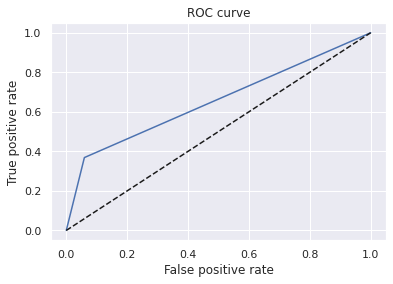

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [ ]:
rf = RandomForestClassifier(random_state=10)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

0.8219523809523809

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=20, random_state=10)

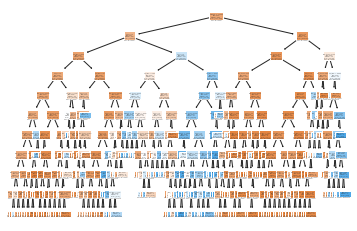

In [ ]:
from sklearn.tree import plot_tree
import matplotlib as plt
plt.figure.Figure(figsize=(680,640))
plot_tree(rf_best.estimators_[5], feature_names = X_train.columns,class_names=['Will Default', "Won't default"],filled=True);


In [ ]:
pd.crosstab(y_train, y_test, rownames = ['Actual'], colnames = ['Predicted'])

""


## **Gradien Boost Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf2=GradientBoostingClassifier(random_state=10)
clf2.fit(X_train,y_train)

y_pred2 = clf2.predict(X_test)
accuracy_gb=accuracy_score(y_test, y_pred2)
precision_gb=precision_score(y_test, y_pred2,average='weighted')
recall_gb=recall_score(y_test, y_pred2,average='weighted')
f1_gb=f1_score(y_test,y_pred2,average='weighted')
print("accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print('f1_score:',f1_gb)



accuracy: 0.8173333333333334
Precision: 0.799185515836454
Recall: 0.8173333333333334
f1_score: 0.7961000986490337


In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier




Best parameters for GradeintBoosting: {'min_samples_split': 10, 'n_estimators': 50}


In [ ]:
clf2=GradientBoostingClassifier(random_state=10,min_samples_split=10,n_estimators=50)
clf2.fit(X_train,y_train)
y_pred2 = clf2.predict(X_train)
y_pred2 = clf2.predict(X_test)
accuracy_gb=accuracy_score(y_test, y_pred2)
precision_gb=precision_score(y_test, y_pred2,average='weighted')
recall_gb=recall_score(y_test, y_pred2,average='weighted')
f1_gb=f1_score(y_test,y_pred2,average='weighted')
print("accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print('f1_score:',f1_gb)

NameError: ignored

## **Adaboost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf3 = AdaBoostClassifier(random_state=10)
clf3.fit(X_train, y_train)

y_pred3 = clf3.predict(X_test)
accuracy_ab=accuracy_score(y_test, y_pred3)
precision_ab=precision_score(y_test, y_pred3,average='weighted')
recall_ab=recall_score(y_test, y_pred3,average='weighted')
f1_ab=f1_score(y_test,y_pred3,average='weighted')
print("accuracy:", accuracy_ab)
print("Precision:", precision_ab)
print("Recall:", recall_ab)
print('f1_score:',f1_ab)

accuracy: 0.8146666666666667
Precision: 0.7973218992476394
Recall: 0.8146666666666667
f1_score: 0.7877112708453133


In [ ]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier
clf3 = AdaBoostClassifier(random_state=10)
clf3.fit(X_train, y_train)

AdaBoostClassifier(random_state=10)

In [ ]:
y_pred3 = clf3.predict(X_test)
accuracy_ab=accuracy_score(y_test, y_pred3)
precision_ab=precision_score(y_test, y_pred3,average='weighted')
recall_ab=recall_score(y_test, y_pred3,average='weighted')
f1_ab=f1_score(y_test,y_pred3,average='weighted')
print("accuracy:", accuracy_ab)
print("Precision:", precision_ab)
print("Recall:", recall_ab)
print('f1_score:',f1_ab)

accuracy: 0.8167777777777778
Precision: 0.7989925350820772
Recall: 0.8167777777777778
f1_score: 0.7908797564310349


In [ ]:
#appending all socres
arraycuracy=[]
arraycuracy.append(accuracy_regr)
arraycuracy.append(accuracy_rf)
arraycuracy.append(accuracy_gb)
arraycuracy.append(accuracy_ab)


In [ ]:
precisionray=[]
precisionray.append(precision_regr)
precisionray.append(precision_rf)
precisionray.append(precision_gb)
precisionray.append(precision_ab)


In [ ]:
recallray=[]
recallray.append(recall_regr)
recallray.append(recall_rf)
recallray.append(recall_gb)
recallray.append(recall_ab)


In [ ]:
f1ray=[]
f1ray.append(f1_regr)
f1ray.append(f1_rf)
f1ray.append(f1_gb)
f1ray.append(f1_ab)


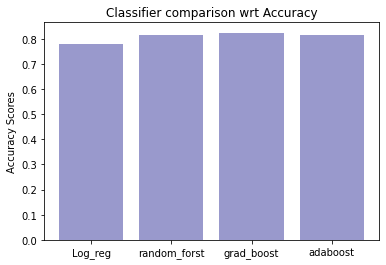

In [ ]:
#Lets compare Accuracy,precison,racall
import matplotlib.pyplot as plt
classifier_names=('Log_reg','random_forst','grad_boost','adaboost')
y_axis=np.arange(len(classifier_names))
plt.bar(y_axis, arraycuracy, alpha=0.4,color='navy',ecolor='navy')
plt.xticks(y_axis, classifier_names)
plt.ylabel('Accuracy Scores')
plt.title('Classifier comparison wrt Accuracy')
plt.show()

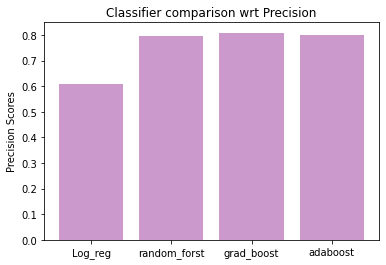

In [ ]:
y_axis=np.arange(len(classifier_names))
plt.bar(y_axis,precisionray, alpha=0.4,color='purple',ecolor='darkgreen')
plt.xticks(y_axis, classifier_names)
plt.ylabel('Precision Scores')
plt.title('Classifier comparison wrt Precision')
plt.show()

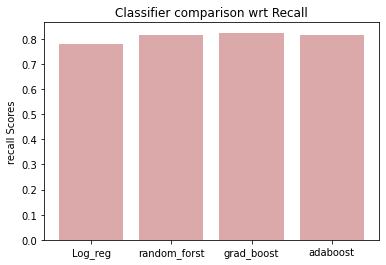

In [ ]:
y_axis=np.arange(len(classifier_names))
plt.bar(y_axis,recallray, alpha=0.4,color='brown',ecolor='black')
plt.xticks(y_axis, classifier_names)
plt.ylabel('recall Scores')
plt.title('Classifier comparison wrt Recall')
plt.show()

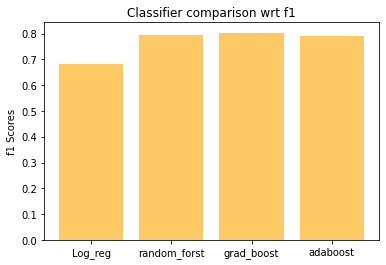

In [ ]:
y_axis=np.arange(len(classifier_names))
plt.bar(y_axis,f1ray, alpha=0.6,color='orange',ecolor='black')
plt.xticks(y_axis, classifier_names)
plt.ylabel('f1 Scores')
plt.title('Classifier comparison wrt f1')
plt.show()

# **LGD Model**

In [ ]:
import pickle
new_df=X
Y1=clf2.predict(X)
accuracy_ab=accuracy_score(Y, Y1)
new_df['default.payment.next.month']=Y
pickle.dump(new_df, open('dataframe1.sav', 'wb'))

In [ ]:
import sklearn
import numpy as np
from sklearn import preprocessing
data_clean=new_df

In [ ]:
loan_data_preprocessed=data_clean
loan_data_preprocessed.columns.values
# Displays all column names.


array(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default.payment.next.month'], dtype=object)

In [ ]:
loan_data_preprocessed.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,50000.0,1,2,1,46,0,0,0,0,0,0,47929.0,48905.0,49764.0,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [ ]:
loan_data_defaults=loan_data_preprocessed[loan_data_preprocessed['default.payment.next.month']==1]
loan_data_defaults.shape

(6636, 24)

In [ ]:
loan_data_defaults.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [ ]:
loan_data_defaults['recoveries']=loan_data_defaults['BILL_AMT1']+loan_data_defaults['BILL_AMT2']+loan_data_defaults['BILL_AMT3']+loan_data_defaults['BILL_AMT4']+loan_data_defaults['BILL_AMT5']+loan_data_defaults['BILL_AMT6']
loan_data_defaults['funded_amnt']=loan_data_defaults['PAY_AMT1']+loan_data_defaults['PAY_AMT2']+loan_data_defaults['PAY_AMT3']+loan_data_defaults['PAY_AMT4']+loan_data_defaults['PAY_AMT5']+loan_data_defaults['PAY_AMT6']
loan_data_defaults['recovery_rate'] = (loan_data_defaults['recoveries']-loan_data_defaults['funded_amnt']) / loan_data_defaults['recoveries']

# It is the ratio of recoveries and funded amount.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
loan_data_defaults['recovery_rate'].describe()



count    6337.000000
mean            -inf
std              NaN
min             -inf
25%         0.712601
50%         0.940693
75%         0.961246
max       542.084677
Name: recovery_rate, dtype: float64

In [ ]:
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0, loan_data_defaults['recovery_rate'])
#recovery rates that are greater than 1 to 1 and recovery rates that are less than 0 to 0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
loan_data_defaults['recovery_rate'].describe()


count    6337.000000
mean        0.759333
std         0.333096
min         0.000000
25%         0.712601
50%         0.940693
75%         0.961246
max         1.000000
Name: recovery_rate, dtype: float64

In [ ]:
loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] / loan_data_defaults['recoveries'])

#ratio of the difference of the amount used at the moment of default to the total funded amount.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
loan_data_defaults['CCF'].describe()


count    6337.000000
mean             inf
std              NaN
min      -541.084677
25%         0.038754
50%         0.059307
75%         0.287399
max              inf
Name: CCF, dtype: float64

In [ ]:
loan_data_defaults.to_csv('loan_data_defaults.csv')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(array([ 591.,   13.,   14.,   13.,   19.,   15.,   11.,   13.,   24.,
          15.,   14.,   19.,   21.,    8.,   24.,   15.,   17.,    8.,
          11.,   12.,   14.,    6.,   15.,   10.,   13.,   19.,   13.,
          14.,   16.,   12.,    9.,   13.,   17.,   18.,   13.,   10.,
           6.,   11.,   12.,   18.,   10.,    8.,   12.,   17.,   14.,
          13.,   12.,   15.,   15.,   18.,   22.,   18.,   10.,   14.,
           9.,   11.,   12.,   14.,   10.,   12.,   16.,   15.,   16.,
          11.,   15.,   18.,   21.,   20.,   16.,   14.,   14.,   19.,
          17.,   22.,   17.,   24.,   21.,   30.,   31.,   29.,   29.,
          30.,   26.,   44.,   43.,   52.,   50.,   66.,   86.,  101.,
         108.,  162.,  222.,  329.,  513.,  942., 1123.,  255.,   61.,
         307.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29

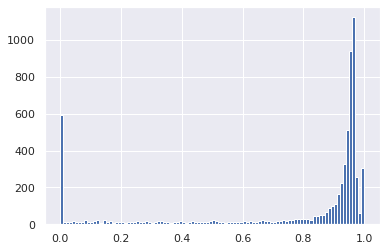

In [ ]:
plt.hist(loan_data_defaults['recovery_rate'], bins = 100)


(array([ 604.,   27.,   34.,   24.,   39.,   33.,   29.,   39.,   25.,
          23.,   20.,   25.,   32.,   27.,   28.,   22.,   35.,   23.,
          17.,   30.,   18.,   29.,   27.,   27.,   33.,   40.,   24.,
          20.,   26.,   22.,   31.,   27.,   33.,   41.,   30.,   33.,
          39.,   41.,   51.,   60.,   59.,   70.,   95.,  116.,  187.,
         270.,  551., 1455., 1378.,  368.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

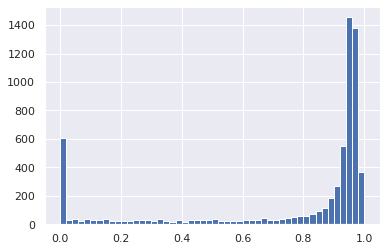

In [ ]:
plt.hist(loan_data_defaults['recovery_rate'], bins = 50)


In [ ]:
loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)
# We create a new variable which is 0 if recovery rate is 0 and 1 otherwise.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.model_selection import train_test_split
loan_data_defaults.isna().sum()
loan_data_defaults=loan_data_defaults.dropna()
loan_data_defaults= loan_data_defaults[ np.isfinite( loan_data_defaults ).all( axis = 1) ]
loan_data_defaults = loan_data_defaults.reset_index()

In [ ]:
# LGD model stage 1 datasets: recovery rate 0 or greater than 0.
lgd_inputs_stage_1_train, lgd_inputs_stage_1_test, lgd_targets_stage_1_train, lgd_targets_stage_1_test = train_test_split(loan_data_defaults.drop(['default.payment.next.month', 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['recovery_rate_0_1'], test_size = 0.2, random_state = 42)

lgd_inputs_stage_1_train.head()

,index,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,recoveries,funded_amnt
1170,5597,30000.0,2,2,1,52,0,0,0,0,-1,-1,20533.0,20819.0,21990.0,15525.0,25242.0,0.0,2000.0,2000.0,5000.0,25242.0,0.0,5000.0,104109.0,39242.0
2053,9582,30000.0,2,3,1,23,2,2,0,0,2,2,15955.0,15410.0,17149.0,18362.0,18919.0,19161.0,0.0,2000.0,1500.0,1000.0,700.0,0.0,104956.0,5200.0
4796,22094,230000.0,2,2,1,28,2,2,2,2,2,2,35610.0,38701.0,35043.0,35678.0,36730.0,35994.0,3706.0,0.0,1513.0,1730.0,2000.0,9000.0,217756.0,17949.0
5703,27059,210000.0,1,2,1,39,-1,-1,-1,-1,0,0,600.0,169.0,497.0,15433.0,8500.0,10500.0,169.0,497.0,15436.0,170.0,2000.0,2822.0,35699.0,21094.0
3670,16862,220000.0,1,1,1,35,-1,-1,-1,-1,0,-1,753.0,6213.0,762.0,5106.0,700.0,1364.0,6220.0,762.0,5806.0,0.0,1364.0,500.0,14898.0,14652.0


In [ ]:
features_all = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_1','PAY_2','PAY_3','PAY_4',	'PAY_5',	'PAY_6',	'BILL_AMT1',	'BILL_AMT2',	'BILL_AMT3',	'BILL_AMT4',	'BILL_AMT5',	'BILL_AMT6',	'PAY_AMT1',	'PAY_AMT2',	'PAY_AMT3',	'PAY_AMT4',	'PAY_AMT5',	'PAY_AMT6','recoveries','funded_amnt']


In [ ]:
lgd_inputs_stage_1_train.head()
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train[features_all]



In [ ]:
lgd_inputs_stage_1_train.isnull().sum()


LIMIT_BAL      0
SEX            0
EDUCATION      0
MARRIAGE       0
AGE            0
PAY_1          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1      0
BILL_AMT2      0
BILL_AMT3      0
BILL_AMT4      0
BILL_AMT5      0
BILL_AMT6      0
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
recoveries     0
funded_amnt    0
dtype: int64

In [ ]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test[features_all]


In [ ]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        #self.z_scores = z_scores
        self.p_values = p_values
        #self.sigma_estimates = sigma_estimates
        #self.F_ij = F_ij

In [ ]:
reg_lgd_st_1 = LogisticRegression_with_p_values()

reg_lgd_st_1.fit(lgd_inputs_stage_1_train, lgd_targets_stage_1_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


In [ ]:
feature_name = lgd_inputs_stage_1_train.columns.values


In [ ]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        #self.z_scores = z_scores
        self.p_values = p_values
        #self.sigma_estimates = sigma_estimates
        #self.F_ij = F_ij

In [ ]:
reg_lgd_st_1 = LogisticRegression_with_p_values()

reg_lgd_st_1.fit(lgd_inputs_stage_1_train, lgd_targets_stage_1_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


In [ ]:
feature_name = lgd_inputs_stage_1_train.columns.values


In [ ]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test[features_all]


In [ ]:
y_hat_test_lgd_stage_1 = reg_lgd_st_1.model.predict(lgd_inputs_stage_1_test)


In [ ]:
y_hat_test_lgd_stage_1

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
y_hat_test_proba_lgd_stage_1 = reg_lgd_st_1.model.predict_proba(lgd_inputs_stage_1_test)


In [ ]:
y_hat_test_proba_lgd_stage_1 = y_hat_test_proba_lgd_stage_1[: ][: , 1]


In [ ]:
y_hat_test_proba_lgd_stage_1

array([0.93471163, 0.34805635, 1.        , ..., 0.45995022, 1.        ,
       0.99999878])

In [ ]:
lgd_targets_stage_1_test_temp = lgd_targets_stage_1_test

In [ ]:
lgd_targets_stage_1_test_temp.reset_index(drop = True, inplace = True)


In [ ]:
df_actual_predicted_probs = pd.concat([lgd_targets_stage_1_test_temp, pd.DataFrame(y_hat_test_proba_lgd_stage_1)], axis = 1)


In [ ]:
df_actual_predicted_probs.columns = ['lgd_targets_stage_1_test', 'y_hat_test_proba_lgd_stage_1']

In [ ]:
df_actual_predicted_probs.index = lgd_inputs_stage_1_test.index


In [ ]:
df_actual_predicted_probs.head()

,lgd_targets_stage_1_test,y_hat_test_proba_lgd_stage_1
4082,1,0.934712
6242,0,0.348056
712,1,1.000000
3648,1,1.000000
2666,1,1.000000


In [ ]:
tr = 0.65

df_actual_predicted_probs['y_hat_test_lgd_stage_1'] = np.where(df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'] > tr, 1, 0)

In [ ]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted'])


Predicted,0,1
Actual,,
0,99,13
1,97,1055


In [ ]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]


Predicted,0,1
Actual,,
0,0.078323,0.010285
1,0.076741,0.834652


In [ ]:
(pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

0.9129746835443038

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])


Text(0.5, 1.0, 'ROC curve')

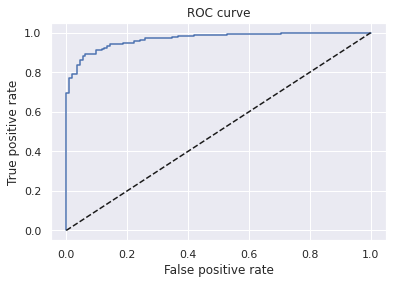

In [ ]:
plt.plot(fpr, tpr)

plt.plot(tpr, tpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

plt.title('ROC curve')


In [ ]:
loan_data_defaults.head()

,index,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,recoveries,funded_amnt,recovery_rate,CCF,recovery_rate_0_1
0,0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0,689.0,0.910566,0.089434,1
1,1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0,5000.0,0.707209,0.292791,1
2,13,70000.0,1,2,2,30,1,2,2,0,0,2,65802.0,67369.0,65701.0,66782.0,36137.0,36894.0,3200.0,0.0,3000.0,3000.0,1500.0,0.0,1,338685.0,10700.0,0.968407,0.031593,1
3,16,20000.0,1,1,2,24,0,0,2,2,2,2,15376.0,18010.0,17428.0,18338.0,17905.0,19104.0,3200.0,0.0,1500.0,0.0,1650.0,0.0,1,106161.0,6350.0,0.940185,0.059815,1
4,21,120000.0,2,2,1,39,-1,-1,-1,-1,-1,-1,316.0,316.0,316.0,0.0,632.0,316.0,316.0,316.0,0.0,632.0,316.0,0.0,1,1896.0,1580.0,0.166667,0.833333,1


# **EAD model**

In [ ]:
# EAD model datasets
ead_inputs_train, ead_inputs_test, ead_targets_train, ead_targets_test = train_test_split(loan_data_defaults.drop([ 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['CCF'], test_size = 0.2, random_state = 42)

ead_inputs_train.columns.values

ead_targets_train.isna().sum()

0

In [ ]:
from sklearn.linear_model import LinearRegression
ead_inputs_train = ead_inputs_train[features_all]
ead_targets_train = ead_targets_train.values.astype(np.float)

reg_ead = LinearRegression()

reg_ead.fit(ead_inputs_train, ead_targets_train)


LinearRegression()

In [ ]:
ead_inputs_test = ead_inputs_test[features_all]

ead_inputs_test.columns.values

array(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'recoveries', 'funded_amnt'], dtype=object)

In [ ]:
y_hat_test_ead = reg_ead.predict(ead_inputs_test)
print(pd.crosstab(ead_targets_test,y_hat_test_ead, rownames = ['Actual'], colnames = ['Predicted']))
ead_targets_test_temp = ead_targets_test
ead_targets_test_temp = ead_targets_test_temp.reset_index(drop = True)

#pd.concat([ead_targets_test_temp, pd.DataFrame(y_hat_test_ead)], axis = 1).corr()


Predicted   -35.330614  -32.155004  ...   8.067244    9.945364 
Actual                              ...                        
-1.920682            0           0  ...           0           0
-1.114228            0           0  ...           0           0
-0.166667            0           0  ...           0           0
-0.033365            0           0  ...           0           0
 0.000000            0           0  ...           0           0
...                ...         ...  ...         ...         ...
 7.744526            0           0  ...           0           0
 9.062857            0           0  ...           0           0
 17.358209           0           0  ...           0           0
 18.211921           0           0  ...           0           0
 50.972544           0           0  ...           0           0

[1177 rows x 1264 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


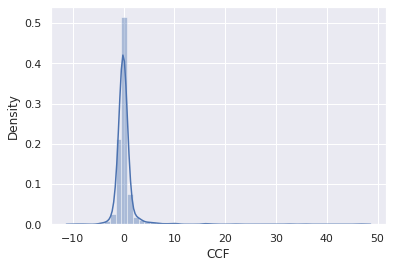

In [ ]:
sns.distplot(ead_targets_test - y_hat_test_ead)
#distribution of the residuals.

In [ ]:
#pd.crosstab(ead_inputs_test,y_hat_test_ead, rownames = ['Actual'], colnames = ['Predicted'])



ValueError: ignored

In [ ]:
y_hat_test_ead = np.where(y_hat_test_ead < 0, 0, y_hat_test_ead)
y_hat_test_ead = np.where(y_hat_test_ead > 1, 1, y_hat_test_ead)
# We set predicted values that are greater than 1 to 1 and predicted values that are less than 0 to 0.
pd.DataFrame(y_hat_test_ead).describe()

,0
count,1264.000000
mean,0.390059
std,0.391316
min,0.000000
25%,0.000000
50%,0.278565
75%,0.771810
max,1.000000


## **Expected Loss**

In [ ]:
loan_data_preprocessed.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
loan_data_defaults['recovery_rate'] = reg_lgd_st_1.model.predict(loan_data_defaults[features_all])

loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0, loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
# We set estimated recovery rates that are greater than 1 to 1 and  estimated recovery rates that are less than 0 to 0.
loan_data_defaults['LGD'] = 1 - loan_data_defaults['recovery_rate']
# We calculate estimated LGD. Estimated LGD equals 1 - estimated recovery rate.
loan_data_defaults['LGD'].describe()
# Shows some descriptive statisics for the values of a column.

count    6319.000000
mean        0.049533
std         0.216996
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: LGD, dtype: float64

In [ ]:
loan_data_defaults['CCF'] = reg_ead.predict(loan_data_defaults[features_all])
# We apply the EAD model to calculate estimated credit conversion factor.
loan_data_defaults['CCF'] = np.where(loan_data_defaults['CCF'] < 0, 0, loan_data_defaults['CCF'])
loan_data_defaults['CCF'] = np.where(loan_data_defaults['CCF'] > 1, 1, loan_data_defaults['CCF'])
# We set estimated CCF that are greater than 1 to 1 and  estimated CCF that are less than 0 to 0.
loan_data_defaults['EAD'] = loan_data_defaults['CCF'] * loan_data_defaults['funded_amnt']
# We calculate estimated EAD. Estimated EAD equals estimated CCF multiplied by funded amount.
loan_data_defaults['EAD'].describe()
# Shows some descriptive statisics for the values of a column.

count      6319.000000
mean       9357.876541
std       27925.137498
min           0.000000
25%           0.000000
50%        1558.755878
75%        6873.118833
max      532465.000000
Name: EAD, dtype: float64

In [ ]:
loan_data_defaults.head()

,index,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,recoveries,funded_amnt,recovery_rate,CCF,recovery_rate_0_1,LGD,EAD
0,0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0,689.0,1,0.000000,1,0,0.000000
1,1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0,5000.0,1,0.000000,1,0,0.000000
2,13,70000.0,1,2,2,30,1,2,2,0,0,2,65802.0,67369.0,65701.0,66782.0,36137.0,36894.0,3200.0,0.0,3000.0,3000.0,1500.0,0.0,1,338685.0,10700.0,1,0.301136,1,0,3222.156577
3,16,20000.0,1,1,2,24,0,0,2,2,2,2,15376.0,18010.0,17428.0,18338.0,17905.0,19104.0,3200.0,0.0,1500.0,0.0,1650.0,0.0,1,106161.0,6350.0,1,0.000000,1,0,0.000000
4,21,120000.0,2,2,1,39,-1,-1,-1,-1,-1,-1,316.0,316.0,316.0,0.0,632.0,316.0,316.0,316.0,0.0,632.0,316.0,0.0,1,1896.0,1580.0,1,0.634439,1,0,1002.413771


In [ ]:
import pickle
reg_pd = pickle.load(open('dataframe1.sav', 'rb'))
print(pd_inputs)

['LIMIT_BAL' 'SEX' 'EDUCATION' 'MARRIAGE' 'AGE' 'PAY_1' 'PAY_2' 'PAY_3'
 'PAY_4' 'PAY_5' 'PAY_6' 'BILL_AMT1' 'BILL_AMT2' 'BILL_AMT3' 'BILL_AMT4'
 'BILL_AMT5' 'BILL_AMT6' 'PAY_AMT1' 'PAY_AMT2' 'PAY_AMT3' 'PAY_AMT4'
 'PAY_AMT5' 'PAY_AMT6']


In [ ]:
PD = clf2.predict(loan_data_defaults[pd_inputs])
# We apply the PD model to caclulate estimated default probabilities.
loan_data_defaults['PD']=PD
loan_data_defaults.head()

,index,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,recoveries,funded_amnt,recovery_rate,CCF,recovery_rate_0_1,LGD,EAD,PD
0,0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0,689.0,1,0.000000,1,0,0.000000,1
1,1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0,5000.0,1,0.000000,1,0,0.000000,0
2,13,70000.0,1,2,2,30,1,2,2,0,0,2,65802.0,67369.0,65701.0,66782.0,36137.0,36894.0,3200.0,0.0,3000.0,3000.0,1500.0,0.0,1,338685.0,10700.0,1,0.301136,1,0,3222.156577,0
3,16,20000.0,1,1,2,24,0,0,2,2,2,2,15376.0,18010.0,17428.0,18338.0,17905.0,19104.0,3200.0,0.0,1500.0,0.0,1650.0,0.0,1,106161.0,6350.0,1,0.000000,1,0,0.000000,0
4,21,120000.0,2,2,1,39,-1,-1,-1,-1,-1,-1,316.0,316.0,316.0,0.0,632.0,316.0,316.0,316.0,0.0,632.0,316.0,0.0,1,1896.0,1580.0,1,0.634439,1,0,1002.413771,0


In [ ]:
loan_data_defaults['EL'] = loan_data_defaults.PD * loan_data_defaults.LGD * loan_data_defaults.EAD
# We calculate Expected Loss. EL = PD * LGD * EAD.
loan_data_defaults['EL'].describe()

count      6319.000000
mean         99.865052
std        3725.429866
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      236349.000000
Name: EL, dtype: float64

In [ ]:
loan_data_defaults[['funded_amnt', 'PD', 'LGD', 'EAD', 'EL']].head()

,funded_amnt,PD,LGD,EAD,EL
0,689.0,1,0,0.000000,0.0
1,5000.0,0,0,0.000000,0.0
2,10700.0,0,0,3222.156577,0.0
3,6350.0,0,0,0.000000,0.0
4,1580.0,0,0,1002.413771,0.0


In [ ]:
loan_data_defaults['EL'].sum()

631047.2606880848

In [ ]:
loan_data_defaults['funded_amnt'].sum()
# Total funded amount for all loans.

132485781.0

In [ ]:
loan_data_defaults['EL'].sum() / loan_data_defaults['funded_amnt'].sum()
# Total Expected Loss as a proportion of total funded amount for all loans.

0.004763131982352769